# I. Data Wrangling

## I-A. Connecting Data

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olist = sqlite3.connect("olist.db")

## 1-B. Order Reviews Dataset

In [2]:
df_reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", olist)

## 1-C. Order Items Dataset

In [3]:
df_order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", olist)

In [4]:
df_order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## I-D. Products Dataset

In [5]:
df_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", olist)

## I-E. Translate Product Category Name

In [6]:
#import the translation
df_translations = pd.read_sql_query("SELECT * FROM product_category_name_translation", olist)
df_translations.drop('index', axis=1, inplace=True)

#make it dictionary
dict_products_en = dict([(i,[x]) for i, x in zip(df_translations.product_category_name, df_translations.product_category_name_english)])

#apply the translation
df_products["product_category_name"] = df_products["product_category_name"].replace(dict_products_en)

In [7]:
df_products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## I-F. Merging Order Reviews with Order Items

In [8]:
reviewed_order = pd.merge(df_reviews, df_order_items, on = 'order_id')

## I-G. Merging Reviewed Order with Products

In [9]:
reviewed_products = pd.merge(reviewed_order, df_products, on = "product_id", how = "left")

In [10]:
reviewed_products.head()

,index_x,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index_y,order_item_id,...,freight_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,51033,1,...,13.63,24450,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,51034,2,...,13.63,24450,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13,72472,1,...,8.30,20298,computers_accessories,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24,109962,1,...,45.12,8290,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,44664,1,...,42.85,24790,garden_tools,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0


# II. Data Cleaning

## II-A. Overall data check

In [11]:
reviewed_products.head()

,index_x,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index_y,order_item_id,...,freight_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,51033,1,...,13.63,24450,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,51034,2,...,13.63,24450,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13,72472,1,...,8.30,20298,computers_accessories,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24,109962,1,...,45.12,8290,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,44664,1,...,42.85,24790,garden_tools,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0


### Make a copy of the dataframe

Before we make an edit, it's suggested to make a copy

In [12]:
reviewed_products_handled = reviewed_products.copy()

## II-B. Check for duplicated data

In [13]:
reviewed_products_handled.duplicated().sum()

0

In [14]:
pd.value_counts(reviewed_products_handled['order_id'])

5a3b1c29a49756e75f1ef513383c0c12    22
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
42d34c5b74d78872ef8ce334bf839627     1
3e01fe3c29238179f003bf1c3445bc34     1
f9a8f148429cc3e0ebfc426bf5f7299e     1
abbc50a1e07d19c76cbcf0b649796bb7     1
90531360ecb1eec2a1fbb265a0db0508     1
Name: order_id, Length: 97917, dtype: int64

Results: No row is duplicated.

However some values in review_id and order_id show up more than once since there is a possibility that in a single order there are more than one item ordered (whether same items or various items). Every row that has the same review_id value will have different value in either order_item_id or product_id or both.

Since the objective is to find the worst reviewed product category, each item in every order_id will be counted as reviewed once.

## II-C Check for inconsistent format

### Look at first 20 rows

In [15]:
reviewed_products_handled.head(20)

,index_x,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index_y,order_item_id,...,freight_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,51033,1,...,13.63,24450,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,51034,2,...,13.63,24450,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13,72472,1,...,8.30,20298,computers_accessories,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24,109962,1,...,45.12,8290,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,44664,1,...,42.85,24790,garden_tools,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
5,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,62361,1,...,134.25,22045,sports_leisure,48.0,562.0,5.0,9850.0,105.0,35.0,50.0
6,5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,None,2018-04-13 00:00:00,2018-04-16 00:39:37,78026,1,...,13.20,17835,bed_bath_table,57.0,246.0,2.0,950.0,46.0,6.0,36.0
7,5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,None,2018-04-13 00:00:00,2018-04-16 00:39:37,78027,2,...,13.20,17835,bed_bath_table,57.0,246.0,2.0,950.0,46.0,6.0,36.0
8,5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,None,2018-04-13 00:00:00,2018-04-16 00:39:37,78028,3,...,4.40,31716,bed_bath_table,30.0,568.0,1.0,900.0,17.0,22.0,17.0
9,5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,None,2018-04-13 00:00:00,2018-04-16 00:39:37,78029,4,...,13.20,17835,bed_bath_table,57.0,246.0,2.0,950.0,46.0,6.0,36.0


### Look at last 10 rows

In [16]:
reviewed_products_handled.tail(20)

,index_x,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index_y,order_item_id,...,freight_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
112352,99203,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,None,Tive um problema na entrega em que o correio c...,2018-02-21 00:00:00,2018-02-23 11:43:12,10938,1,...,15.10,5893,construction_tools_construction,57.0,338.0,1.0,2150.0,20.0,8.0,20.0
112353,99204,7e42a39bc8cf4d1eb5897cb48c2889f7,287445be3e2a5f0d3f5036b2a778d1c5,5,None,None,2018-05-23 00:00:00,2018-05-23 20:40:29,17640,1,...,23.00,21940,auto,59.0,460.0,6.0,3850.0,47.0,19.0,23.0
112354,99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,None,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,93368,1,...,21.19,26266,watches_gifts,55.0,324.0,5.0,250.0,16.0,2.0,20.0
112355,99206,6c5fa14b1cb0ede918c75b1fabb222a5,10a3f7e9bf88b7dc86a767fd278e5bd2,5,None,None,2017-11-21 00:00:00,2017-11-23 08:28:00,7349,1,...,16.18,7033,electronics,52.0,293.0,2.0,275.0,28.0,9.0,22.0
112356,99207,586e77c5f02b95285a939083359f8241,5f4a120717a4d152577d7d2ec66c45be,5,None,None,2018-08-05 00:00:00,2018-08-06 09:48:41,41814,1,...,40.34,8277,kitchen_dining_laundry_garden_furniture,38.0,245.0,1.0,4000.0,31.0,42.0,43.0
112357,99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,None,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,35597,1,...,8.71,25467,sports_leisure,51.0,2251.0,5.0,300.0,16.0,11.0,11.0
112358,99209,aa711ac8a41557897f94dd7cd1846bdd,ef8e8348ba291917542268f900fac505,5,None,None,2017-03-08 00:00:00,2017-03-09 13:34:57,105457,1,...,11.24,9661,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
112359,99210,c2642a756d89f7e781ca0180829770bb,652050879a7da861024a1114f926958d,5,None,None,2018-06-08 00:00:00,2018-06-08 22:22:23,44504,1,...,42.59,28389,housewares,55.0,375.0,3.0,10050.0,31.0,61.0,31.0
112360,99211,8eff18f2dba837af3a03329b574f12ec,ae89f3c648838ad99ed4616f05b2662a,5,None,None,2017-06-20 00:00:00,2017-06-21 00:19:29,76655,1,...,16.15,12951,perfumery,57.0,483.0,1.0,350.0,17.0,13.0,12.0
112361,99213,e1178b88d0759176025710ea91094d34,00bdcdda88e6b02977fc6ce3d412c600,5,None,None,2018-06-19 00:00:00,2018-06-21 11:59:20,303,1,...,18.93,32205,watches_gifts,39.0,243.0,1.0,500.0,22.0,14.0,21.0


Results: After checking with info(), value_counts(), head(), and tail(). No inconsistent format in any columns. But review_creation_date, review_answer_timestamp, and shipping_limit_date column should be in date type. Yet because we will not use it in this objective, we will leave it as it is.

## II-D. Check for missing data / value

### Check the amount of missing value

In [17]:
reviewed_products_handled.isna().sum()

index_x                           0
review_id                         0
order_id                          0
review_score                      0
review_comment_title          98938
review_comment_message        64730
review_creation_date              0
review_answer_timestamp           0
index_y                           0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
index                             0
product_category_name          1598
product_name_lenght            1598
product_description_lenght     1598
product_photos_qty             1598
product_weight_g                 18
product_length_cm                18
product_height_cm                18
product_width_cm                 18
dtype: int64

Since we cannot just assign a value to product_category_name, then we will drop the row where it contains missing value of product_category_name

### Fill Review Comment Title and Message

NaN in review_comment_title means the reviewer did not put review comment title and NaN in review_comment_message means the reviewer did not fill the review comment message, they only gave the review on review_score.

In [18]:
reviewed_products_handled['review_comment_title'] = reviewed_products_handled['review_comment_title'].fillna("no title review")
reviewed_products_handled['review_comment_message'] = reviewed_products_handled['review_comment_message'].fillna("no message")

### Cleaning row containing missing product_category_name value

In [19]:
reviewed_products_handled.dropna(subset = "product_category_name", inplace = True)

### Drop columns containing missing values

Since we will not use data from product_weight_g, product_length_cm, product_height_cm, and product_width_cm, they are safe to be dropped

In [20]:
reviewed_products_handled.drop(["product_weight_g", "product_height_cm", "product_width_cm", "product_length_cm"], axis = 1, inplace = True)

Missing values are successfully handled

In [38]:
reviewed_products_handled.isna().sum()

index_x                       0
review_id                     0
order_id                      0
review_score                  0
review_comment_title          0
review_comment_message        0
review_creation_date          0
review_answer_timestamp       0
index_y                       0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
index                         0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
dtype: int64

## II-E Check for Outliers

For this objective, we only need review_id, product_category_name, and review_score. With the results above, only review_score that have to be checked if the values are in range of 1 to 5.

In [21]:
reviewed_products_handled['review_score'].describe()

count    110774.000000
mean          4.035234
std           1.385417
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

The data show for review_score only ranging from 1 to 5, thus no outliers need to be handled

# III. DATA MANIPULATION

## III-A Pivot

### Create the Pivot table

We use product_category_name as the index and value from review_score as the columns. The values are the count of the given review or in this case, the count of unique review_id.

In [22]:
review_pivot = reviewed_products_handled.pivot_table(values = "review_id", index = ["product_category_name"], columns = ["review_score"], aggfunc = pd.Series.nunique, fill_value = 0, margins = True)

In [23]:
review_pivot.head()

review_score,1,2,3,4,5,All
product_category_name,,,,,,
agro_industry_and_commerce,21,6,13,50,92,182
air_conditioning,34,7,19,47,142,249
art,25,7,18,38,112,200
arts_and_craftmanship,3,0,2,3,15,23
audio,58,19,33,53,185,348


In [24]:
review_pivot.tail()

review_score,1,2,3,4,5,All
product_category_name,,,,,,
tablets_printing_image,4,6,5,21,41,77
telephony,485,159,416,901,2209,4170
toys,392,97,293,684,2390,3856
watches_gifts,655,193,480,1053,3201,5582
All,10556,3013,7962,18706,56104,96341


## III-B Transform the Value to Percentage Form

### Copy the review_pivot before handling

In [25]:
review_pivot_handled = review_pivot.copy()

### Transform the values into percentage form

In [26]:
review_pivot_handled[1] = review_pivot_handled[1]/review_pivot_handled["All"] * 100
review_pivot_handled[2] = review_pivot_handled[2]/review_pivot_handled["All"] * 100
review_pivot_handled[3] = review_pivot_handled[3]/review_pivot_handled["All"] * 100
review_pivot_handled[4] = review_pivot_handled[4]/review_pivot_handled["All"] * 100
review_pivot_handled[5] = review_pivot_handled[5]/review_pivot_handled["All"] * 100


### Round the percentage to 1 decimal for better readibility

In [27]:
review_pivot_handled = review_pivot_handled.round(1)

In [28]:
review_pivot_handled.head()

review_score,1,2,3,4,5,All
product_category_name,,,,,,
agro_industry_and_commerce,11.5,3.3,7.1,27.5,50.5,182
air_conditioning,13.7,2.8,7.6,18.9,57.0,249
art,12.5,3.5,9.0,19.0,56.0,200
arts_and_craftmanship,13.0,0.0,8.7,13.0,65.2,23
audio,16.7,5.5,9.5,15.2,53.2,348


## III-C Filter and Sort the Data

### Filter the data

For this objective, we classified a product category to "Bad reviewed products" if it comply one or more of this criteria:
1. If the product category have 17.5% or more of 1 review score
2. If the product category have 35% or more of 1 and 2 review score combined
3. If the product category have 70% or more of 1, 2 and 3 review score combined

In [29]:
review_pivot_handled = review_pivot_handled[(review_pivot_handled[1] > 17.5) | (review_pivot_handled[1] + review_pivot_handled[2] > 35) |
                                           (review_pivot_handled[1] + review_pivot_handled[2] + review_pivot_handled[3] > 70)]

In [30]:
review_pivot_handled.head(10)

review_score,1,2,3,4,5,All
product_category_name,,,,,,
construction_tools_safety,18.1,2.4,7.8,19.9,51.8,166
diapers_and_hygiene,18.5,0.0,14.8,22.2,44.4,27
fashion_male_clothing,23.4,2.7,6.3,15.3,52.3,111
furniture_mattress_and_upholstery,18.4,2.6,7.9,21.1,50.0,38
office_furniture,17.9,4.8,14.5,23.2,39.7,1265
pc_gamer,37.5,0.0,0.0,37.5,25.0,8
security_and_services,50.0,0.0,0.0,50.0,0.0,2


### Sort the data

We sort by the highest 1 score review

'All' column is changed to 'Total Reviewed' to avoid confusion

In [47]:
review_pivot_handled.sort_values(1, ascending = False, inplace = True)
review_pivot_handled.rename(columns = {'All' : 'Total Reviewed'}, inplace = True)

In [46]:
review_pivot_handled.head(10)

review_score,1,2,3,4,5,Total Reviewed
product_category_name,,,,,,
security_and_services,50.0,0.0,0.0,50.0,0.0,2
pc_gamer,37.5,0.0,0.0,37.5,25.0,8
fashion_male_clothing,23.4,2.7,6.3,15.3,52.3,111
diapers_and_hygiene,18.5,0.0,14.8,22.2,44.4,27
furniture_mattress_and_upholstery,18.4,2.6,7.9,21.1,50.0,38
construction_tools_safety,18.1,2.4,7.8,19.9,51.8,166
office_furniture,17.9,4.8,14.5,23.2,39.7,1265


# IV. Data Plotting

For data visualization, we display it as trends

## IV-A Prepare the data

### Removing 'Total Ordered' Column

For plotting purposes, we remove the total column.
We also reset the index for easier processing

In [33]:
review_plot = review_pivot_handled.drop("Total Reviewed", axis = 1)
review_plot.reset_index(inplace = True)

In [34]:
review_plot.head(10)

review_score,product_category_name,1,2,3,4,5
0,security_and_services,50.0,0.0,0.0,50.0,0.0
1,pc_gamer,37.5,0.0,0.0,37.5,25.0
2,fashion_male_clothing,23.4,2.7,6.3,15.3,52.3
3,diapers_and_hygiene,18.5,0.0,14.8,22.2,44.4
4,furniture_mattress_and_upholstery,18.4,2.6,7.9,21.1,50.0
5,construction_tools_safety,18.1,2.4,7.8,19.9,51.8
6,office_furniture,17.9,4.8,14.5,23.2,39.7


### Melting the pivot table

In [35]:
review_plot = review_plot.melt('product_category_name', var_name='rating', value_name='percentage')

In [36]:
review_plot.head(20)

,product_category_name,rating,percentage
0,security_and_services,1,50.0
1,pc_gamer,1,37.5
2,fashion_male_clothing,1,23.4
3,diapers_and_hygiene,1,18.5
4,furniture_mattress_and_upholstery,1,18.4
5,construction_tools_safety,1,18.1
6,office_furniture,1,17.9
7,security_and_services,2,0.0
8,pc_gamer,2,0.0
9,fashion_male_clothing,2,2.7


## IV-B. Plot the Data

Text(0.5, 1.0, 'Worst Reviewed Product Categories')

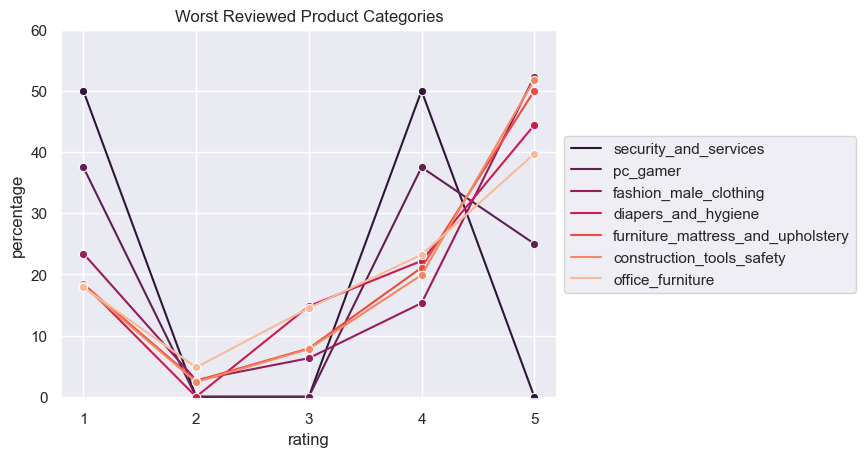

In [40]:
sns.set_theme()
ax = sns.lineplot(data = review_plot, x = 'rating', y = 'percentage', hue = "product_category_name", marker ='o', palette = "rocket")

plt.xticks(ticks = [1,2,3,4,5])
plt.ylim(-0.4,60)
plt.legend(loc = 'center left', bbox_to_anchor  = (1,0.5))

ax.set_title('Worst Reviewed Product Categories')